## K Nearest Neighbor

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [4]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


### Split Dataset in Train and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
print(X_test)

[[-0.49618606  0.56021375]
 [ 0.2389044  -0.59133674]
 [-0.03675452  0.18673792]
 [-0.49618606  0.31122986]
 [-0.03675452 -0.59133674]
 [-0.77184498 -1.52502632]
 [-0.40429975 -1.68064126]
 [ 0.05513178  2.33422397]
 [-1.59882175 -0.03112299]
 [ 1.06588117 -0.80919764]
 [-0.49618606 -0.62245972]
 [-0.67995868 -0.43572181]
 [ 0.14701809 -0.43572181]
 [ 0.33079071  0.24898389]
 [-1.41504914  0.52909077]
 [-0.31241345  1.49390334]
 [ 0.14701809  0.24898389]
 [-1.50693545  0.49796778]
 [ 1.80097163  1.89850216]
 [-0.03675452 -1.46278035]
 [-0.03675452 -0.6847057 ]
 [ 1.06588117  2.33422397]
 [ 0.51456332 -0.56021375]
 [ 1.06588117  1.1204275 ]
 [-1.13939022 -1.27604243]
 [ 1.24965379  2.24085501]
 [-0.67995868  0.56021375]
 [-0.58807237  0.34235285]
 [ 0.14701809 -0.2178609 ]
 [-0.31241345  0.52909077]
 [-1.32316283  0.59133674]
 [ 0.14701809  0.31122986]
 [ 1.98474425 -0.28010688]
 [ 0.14701809 -0.49796778]
 [-1.04750391 -0.34235285]
 [-1.59882175 -0.52909077]
 [-1.23127652  0.37347583]
 

In [8]:
print(X_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [10]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


### Training KNN model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Making a single prediction
classifier.predict(sc.transform([[30, 37000]]))

array([0])

In [14]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [ ]:
# Creating the prediction set
y_pred = classifier.predict(X_test)
print(np.concat((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


### Confusion Matrix and Accuracy Score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[54  4]
 [ 1 21]]


0.9375

### Visualization Training Set

/var/folders/yl/5z_0b2k971j0fv_1mypdpx180000gn/T/ipykernel_76297/106732164.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)


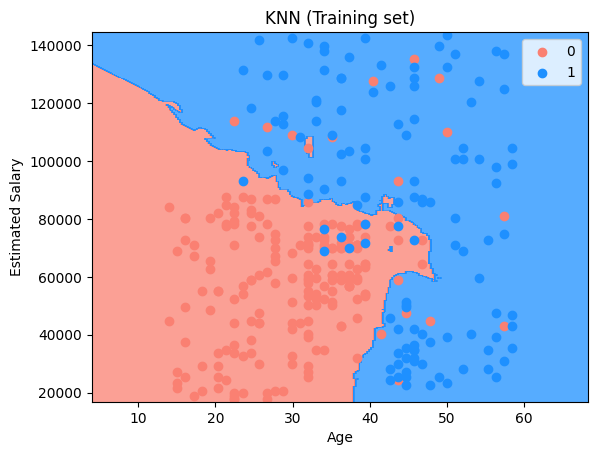

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualization Test set

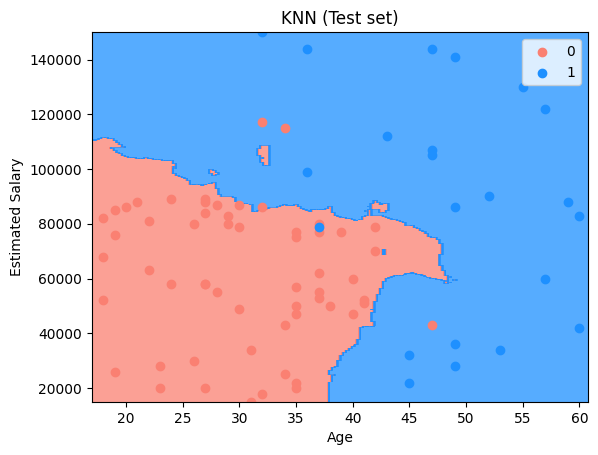

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()